In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import load_iris
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
np.random.seed(11)

In [8]:
# Initialize the initial centers
def kmeans_init_centers(X, k):
    # randomly pick k rows of X as initial centers
    return X[np.random.choice(X.shape[0], k, replace=False)]

# Assign new labels to points when the center is known
def kmeans_assign_labels(X, centers):
    # calculate pairwise distances btw data and centers
    D = cdist(X, centers)
    # return index of the closest center
    return np.argmin(D, axis = 1)

# Update the new centers based on the data that has just been labeled.
def kmeans_update_centers(X, labels, K):
    centers = np.zeros((K, X.shape[1]))
    for k in range(K):
        # collect all points assigned to the k-th cluster
        Xk = X[labels == k, :]
        # take average
        centers[k,:] = np.mean(Xk, axis = 0)
    return centers

# Check the stopping condition of the algorithm
def has_converged(centers, new_centers):
    # return True if two sets of centers are the same
    return (set([tuple(a) for a in centers]) == set([tuple(a) for a in new_centers]))

def my_kmeans(X, K):
    # initialize the initial state with centers, labels and iterations
    centers = [kmeans_init_centers(X, K)]
    labels = []
    it = 0
    
    # conduct clustering until has no difference between previous and current centers
    while True:
        labels.append(kmeans_assign_labels(X, centers[-1]))
        new_centers = kmeans_update_centers(X, labels[-1], K)
        if has_converged(centers[-1], new_centers):
            break
        centers.append(new_centers)
        it += 1
    return (centers, labels, it)

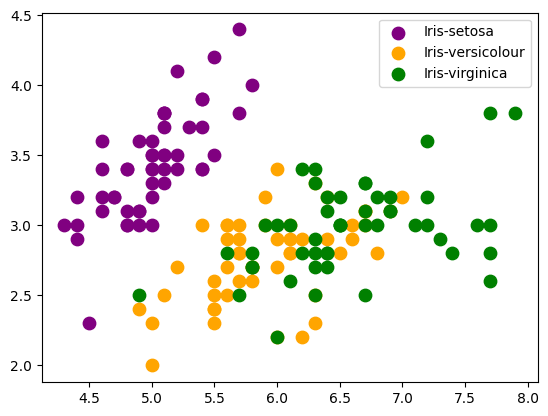

In [9]:

# load iris dataset
iris = load_iris()
df = pd.DataFrame(data= iris.data, columns= iris.feature_names)
df['target'] = iris.target 

X = df.values

X0 = df.loc[df['target'] == 0].drop('target', axis =1).values
X1 = df.loc[df['target'] == 1].drop('target', axis =1).values
X2 = df.loc[df['target'] == 2].drop('target', axis =1).values

plt.scatter(X0[:, 0], X0[:, 1], s = 80, c = 'purple', label = 'Iris-setosa')
plt.scatter(X1[:, 0], X1[:, 1], s = 80, c = 'orange', label = 'Iris-versicolour')
plt.scatter(X2[:, 0], X2[:, 1], s = 80, c = 'green',  label = 'Iris-virginica')
plt.legend()


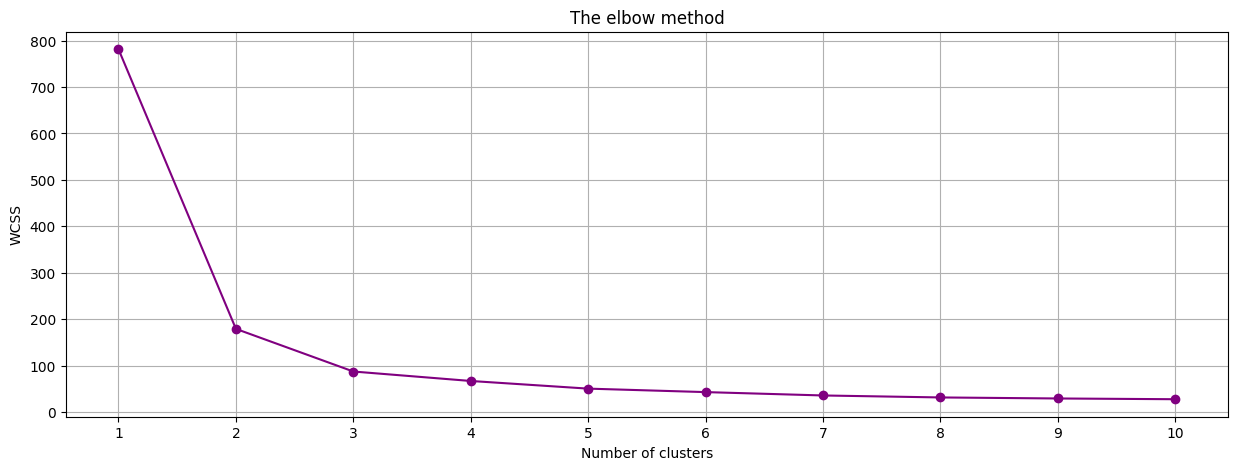

In [10]:
#Finding the optimum number of clusters for k-means classification
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 500, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
#plot with grid lines
plt.figure(figsize=(15,5))
plt.plot(range(1, 11), wcss,  marker='o', linestyle='-', color='purple')
plt.grid()
plt.xticks(range(1, 11))  
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

Centers found by our algorithm:
[[6.62244898 2.98367347 5.57346939 2.03265306 2.        ]
 [5.91568627 2.76470588 4.26470588 1.33333333 1.01960784]
 [5.006      3.428      1.462      0.246      0.        ]]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


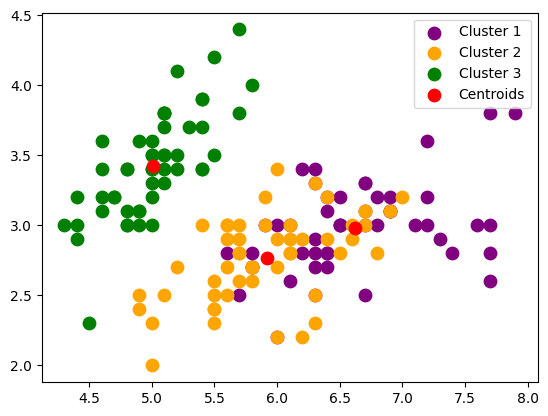

In [11]:
(centers, labels, it) = my_kmeans(X, 3)
cluster_centers = centers[-1]
cluster_labels = labels[-1]

print('Centers found by our algorithm:')
print(centers[-1])
print(labels[-1])


# kmeans_display(X, labels[-1])
#Visualising the clusters
plt.scatter(X[cluster_labels == 0, 0], X[cluster_labels == 0, 1], s = 80, c = 'purple', label = 'Cluster 1')
plt.scatter(X[cluster_labels == 1, 0], X[cluster_labels == 1, 1], s = 80, c = 'orange', label = 'Cluster 2')
plt.scatter(X[cluster_labels == 2, 0], X[cluster_labels == 2, 1], s = 80, c = 'green', label = 'Cluster 3')

#Plotting the centroids of the clusters
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s = 80, c = 'red', label = 'Centroids')

plt.legend()